# Metrics for the challenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
random_seed = 42

from cascade.utility.metrics import Metrics
from neuralpredictors.measures.np_functions import corr, fev

### Generate some dummy data for responses and predictions (with shuffled neuron ids and trial indices) 

In [2]:
np.random.seed(random_seed)

n_neurons = 50
n_images = 15
n_repeats = 10
n_trials = n_images * n_repeats

predictions = np.vstack([np.repeat(np.random.rand(1, n_neurons), n_repeats, axis=0) for _ in range(n_images)])
responses = predictions + np.random.randn(n_trials, n_neurons) / 10

trial_idx = np.arange(n_trials)
image_ids = np.concatenate([np.array([i] * n_repeats) for i in range (n_images)])
neuron_ids = np.arange(n_neurons)

# shuffle the stuff for submission
shuffled_trial_indices = np.random.permutation(n_trials)
shuffled_neuron_indices = np.random.permutation(n_neurons)

trial_idx_submitted = trial_idx[shuffled_trial_indices]
image_ids_submitted = image_ids[shuffled_trial_indices]
neuron_ids_submitted = neuron_ids[shuffled_neuron_indices]
predictions_submitted = predictions[shuffled_trial_indices, :][:, shuffled_neuron_indices]

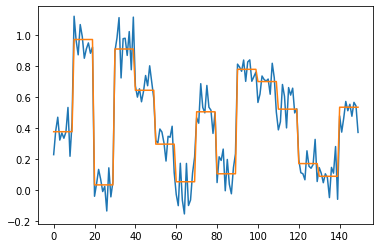

In [3]:
plt.plot(responses[:, 0])
plt.plot(predictions[:, 0])

### Initialize the metrics object and compute different metrics

In [4]:
metric = Metrics(responses, trial_idx, image_ids, neuron_ids)

In [5]:
corr_to_single_trial = metric.correlation_to_single_trials(predictions_submitted, trial_idx_submitted, neuron_ids_submitted, per_neuron=True)
corr_to_mean = metric.correlation_to_mean_across_repeats(predictions_submitted, trial_idx_submitted, neuron_ids_submitted, per_neuron=True)
feve = metric.FEVE(predictions_submitted, trial_idx_submitted, neuron_ids_submitted, per_neuron=True)

### Check whether the methods are working fine

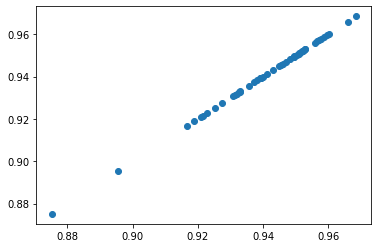

In [6]:
plt.scatter(corr_to_single_trial, corr(responses, predictions, axis=0))

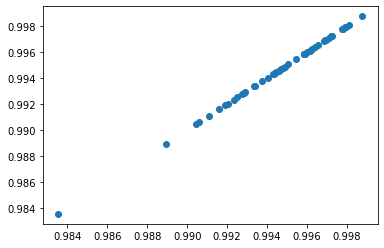

In [7]:
plt.scatter(corr_to_mean, 
            corr(responses.reshape(n_images, n_repeats, n_neurons).mean(axis=1), 
                 predictions.reshape(n_images, n_repeats, n_neurons).mean(axis=1), axis=0))

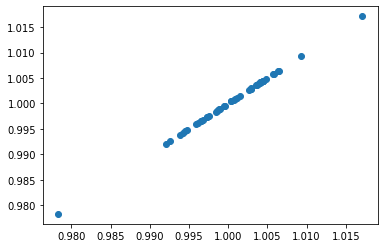

In [8]:
plt.scatter(feve, 
            fev(responses.reshape(n_images, n_repeats, n_neurons), 
                predictions.reshape(n_images, n_repeats, n_neurons)))